## Deploying GAN for generating fake data

In [ ]:
#!pip install pytorch

In [ ]:
import torch

In [ ]:
from torch import nn #neural network
import math #making data & pi value
import matplotlib.pyplot as plt

## Preparing Training data

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length,2)) #tensor
train_data[:,0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])

In [ ]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i])
    for i in range(train_data_length)
]
train_set
#len(train_set)

[(tensor([2.6072, 0.5093]), tensor(0.)),
 (tensor([0.7362, 0.6715]), tensor(0.)),
 (tensor([ 4.9029, -0.9819]), tensor(0.)),
 (tensor([ 5.8221, -0.4449]), tensor(0.)),
 (tensor([1.3071, 0.9654]), tensor(0.)),
 (tensor([0.0178, 0.0178]), tensor(0.)),
 (tensor([1.3832, 0.9825]), tensor(0.)),
 (tensor([ 6.2229, -0.0602]), tensor(0.)),
 (tensor([ 5.1148, -0.9201]), tensor(0.)),
 (tensor([2.6813, 0.4442]), tensor(0.)),
 (tensor([ 3.2231, -0.0815]), tensor(0.)),
 (tensor([2.3953, 0.6790]), tensor(0.)),
 (tensor([2.5022, 0.5967]), tensor(0.)),
 (tensor([0.2487, 0.2462]), tensor(0.)),
 (tensor([1.1322, 0.9054]), tensor(0.)),
 (tensor([ 4.4739, -0.9717]), tensor(0.)),
 (tensor([1.2536, 0.9501]), tensor(0.)),
 (tensor([2.2257, 0.7931]), tensor(0.)),
 (tensor([ 5.0824, -0.9323]), tensor(0.)),
 (tensor([ 4.9834, -0.9635]), tensor(0.)),
 (tensor([1.0851, 0.8843]), tensor(0.)),
 (tensor([1.3277, 0.9706]), tensor(0.)),
 (tensor([ 3.7435, -0.5662]), tensor(0.)),
 (tensor([ 3.1706, -0.0290]), tensor(0.

## Visualising the dataset

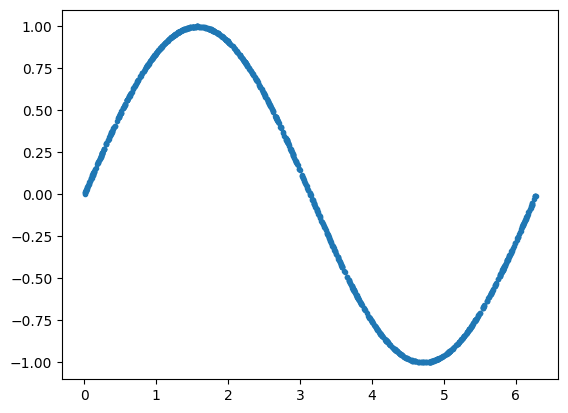

In [ ]:
plt.plot(train_data[:,0],train_data[:,1],".")

## Creating data loader for batchwise training

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size)
train_loader

In [ ]:
class Discriminator(nn.Module): #creating child class of nn
  def __init__(self):       ##Constructor
    super().__init__()
    #Sequential
    #Vanilla GAN
    self.model = nn.Sequential(
        nn.Linear(2,256),       #dense layer in GAN
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64,1),
        nn.Sigmoid(),     #output in prob.
    )

  def forward(self,x):
    output = self.model(x)
    return output

In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,2), #one sample contains 2 values
    )

  def forward(self,x):
    output = self.model(x)
    return output

## Creating objects for both classes

In [ ]:
discriminator = Discriminator()
generator = Generator()

## Setting Parameters for training

In [ ]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss() ##Binary Cross Entropy loss function

## Setting Optimizers

In [ ]:
optimizer_d = torch.optim.Adam(discriminator.parameters(),lr = lr)
optimizer_g = torch.optim.Adam(generator.parameters(),lr = lr) # weights of the connections (parameters)

## Training GAN

In [ ]:
for epoch in range(num_epochs):
  for n,(real_samples,_) in enumerate(train_loader):
    real_samples_labels = torch.ones((batch_size,1))
    latent_space_samples = torch.randn((batch_size,2)) #noise
    generated_samples = generator(latent_space_samples)  #to generate fake samples
    generated_samples_labels = torch.zeros((batch_size,1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

    # Training Discriminator
    discriminator.zero_grad()        #to remove garbage value we initial it to zero
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator,all_samples_labels)
    loss_discriminator.backward()    #backward propagation
    optimizer_d.step()

    #Generate random noise for training generator
    latent_space_samples = torch.randn((batch_size,2))

    #Training generator
    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
    loss_generator.backward()
    optimizer_g.step()

## Generating Fake data & visualizing

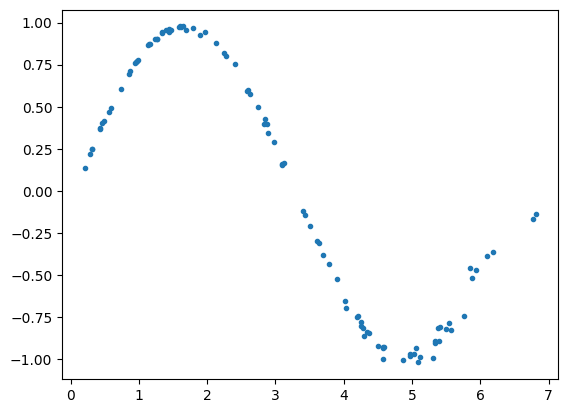

In [ ]:
latent_space_samples = torch.randn(100,2)
generated_sample = generator(latent_space_samples)
generated_samples = generated_sample.detach()
plt.plot(
    generated_samples[:,0],
    generated_samples[:,1],
    "."
    )